In [2]:
# EJECUTAR EN CASO DE QUE NO TENGA LA LIBRERIA

#!pip install matplotlib-venn

In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
import os

In [4]:
chile_df = pd.read_csv('data_clean/chile_clean.csv')
argentina_df = pd.read_csv('data_clean/argentina_clean.csv')
antartica_df = pd.read_csv('data_clean/antartica_clean.csv')

# ¿Existen similitudes en la distribución de especies fósiles entre las costas de Chile y Argentina durante perídos geológicos específicos?

## **Enfoque y Objetivo**

En este análisis, buscamos explorar la biodiversidad fósil en las costas de Chile y Argentina, centrándonos en las similitudes y diferencias en la distribución de especies fósiles durante diferentes eras geológicas.  

Para ello, adoptamos un enfoque estructurado que incluye:  
1. **Filtrar datos fósiles costeros** para eliminar información irrelevante de zonas continentales.  
2. **Estudiar la diversidad fósil** en términos de riqueza y similitud entre especies por eras geológicas.  
3. **Aplicar índices de similitud**, como el índice de Jaccard, para medir la relación entre las especies compartidas y únicas de cada región.  

Este enfoque nos permitirá:  
- Cuantificar la similitud entre ambas regiones costeras utilizando un método riguroso.  
- Contextualizar los resultados en un marco geológico e histórico para entender los factores detrás de las diferencias observadas.  

---

## **Índice de Jaccard: Fundamentación y Uso**

El índice de Jaccard es una métrica utilizada para evaluar la similitud entre dos conjuntos, considerando las especies compartidas y las únicas. Se define como:  


$$J(A, B) = \frac{|A \cap B|}{|A \cup B|}$$

Donde:  
- $|A \cap B| $: Número de especies comunes entre las costas de Chile y Argentina.  
- $|A \cup B| $: Número total de especies únicas combinadas en ambas costas.  

### **Interpretación del Índice de Jaccard**
- **Valores cercanos a 0**: Baja similitud; pocas especies compartidas.  
- **Valores cercanos a 1**: Alta similitud; muchas especies compartidas.  

**¿Por qué usar el índice de Jaccard en este caso?**  
- Es ideal para comparar conjuntos discretos, como listas de especies fósiles.  
- Permite cuantificar la similitud entre dos regiones y evaluar si existe una conexión biológica significativa entre sus comunidades fósiles.

---

### **1. Preparación de los Datos**
- **Objetivo:** Filtrar los datos fósiles para enfocarse únicamente en las regiones costeras de Chile y Argentina.  

In [5]:
# Chile: Costas están entre el Océano Pacífico, longitud < -70.
chile_costas = chile_df[chile_df['lng'] < -70]

# Argentina: Costas están entre el Océano Atlántico, longitud > -65.
argentina_costas = argentina_df[argentina_df['lng'] > -65]

print(f"Registros en las costas de Chile: {len(chile_costas)}")
print(f"Registros en las costas de Argentina: {len(argentina_costas)}")


Registros en las costas de Chile: 7297
Registros en las costas de Argentina: 4519


### **2. Análisis de Diversidad por Era Geológica**
- **Objetivo:** Evaluar la cantidad de especies únicas presentes en las costas de cada país en cada era geológica.  

In [6]:
unique_species_chile_costas = chile_costas['species_name'].nunique()
unique_species_argentina_costas = argentina_costas['species_name'].nunique()

print(f"Especies únicas en las costas de Chile: {unique_species_chile_costas}")
print(f"Especies únicas en las costas de Argentina: {unique_species_argentina_costas}")

Especies únicas en las costas de Chile: 1132
Especies únicas en las costas de Argentina: 950


In [7]:
chile_coastal_species = set(chile_costas['species_name'])
argentina_coastal_species = set(argentina_costas['species_name'])

shared_coastal_species = chile_coastal_species.intersection(argentina_coastal_species)
unique_to_chile = chile_coastal_species - argentina_coastal_species
unique_to_argentina = argentina_coastal_species - chile_coastal_species

print(f"Especies compartidas entre las costas: {len(shared_coastal_species)}")
print(f"Especies únicas en las costas de Chile: {len(unique_to_chile)}")
print(f"Especies únicas en las costas de Argentina: {len(unique_to_argentina)}")


Especies compartidas entre las costas: 126
Especies únicas en las costas de Chile: 1006
Especies únicas en las costas de Argentina: 824


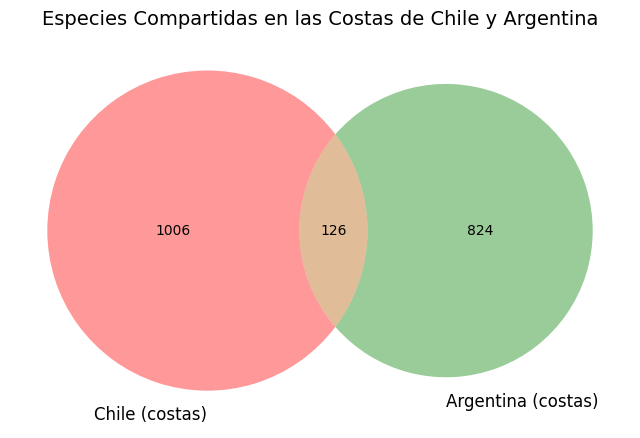

In [8]:
from matplotlib_venn import venn2

# Crear diagrama de Venn
plt.figure(figsize=(8, 6))
venn = venn2([chile_coastal_species, argentina_coastal_species], ('Chile (costas)', 'Argentina (costas)'))
plt.title("Especies Compartidas en las Costas de Chile y Argentina", fontsize=14)
plt.show()


Como podemos apreciar aunque Chile y Argentina sean paises vecinos no comparten un numero muy grande de especies fosiles y esto se puede deber a muchos factores tales como el medioambiente o el clima, ya que estos factores son muy determinantes a la hora de la evolucion, lo que puede hacer "cambiar las especias", por otro lado como estos paises estan "divididos" por la Cordillera de los Andes esto pudo haber dificultado migraciones de estos animales dificultando aun mas que en estos paises hayan fosiles de las mismas especies

---

### **3. Visualización de la Diversidad**
- **Objetivo:** Representar gráficamente la diversidad fósil de cada país por era geológica para facilitar la interpretación de los datos.  


In [9]:
species_by_era_chile_costas = chile_costas.groupby('era_early')['species_name'].nunique()
species_by_era_argentina_costas = argentina_costas.groupby('era_early')['species_name'].nunique()

print("\nEspecies por era geológica en las costas de Chile:")
print(species_by_era_chile_costas)

print("\nEspecies por era geológica en las costas de Argentina:")
print(species_by_era_argentina_costas)


Especies por era geológica en las costas de Chile:
era_early
Carboniferous      2
Cretaceous       243
Jurassic         307
Neogene          459
Ordovician         1
Paleogene         77
Paleozoic          2
Permian            4
Quaternary       159
Triassic          51
Name: species_name, dtype: int64

Especies por era geológica en las costas de Argentina:
era_early
Cambrian          21
Carboniferous     11
Cretaceous         6
Neogene          617
Ordovician        49
Paleogene         79
Permian           22
Quaternary       261
Name: species_name, dtype: int64


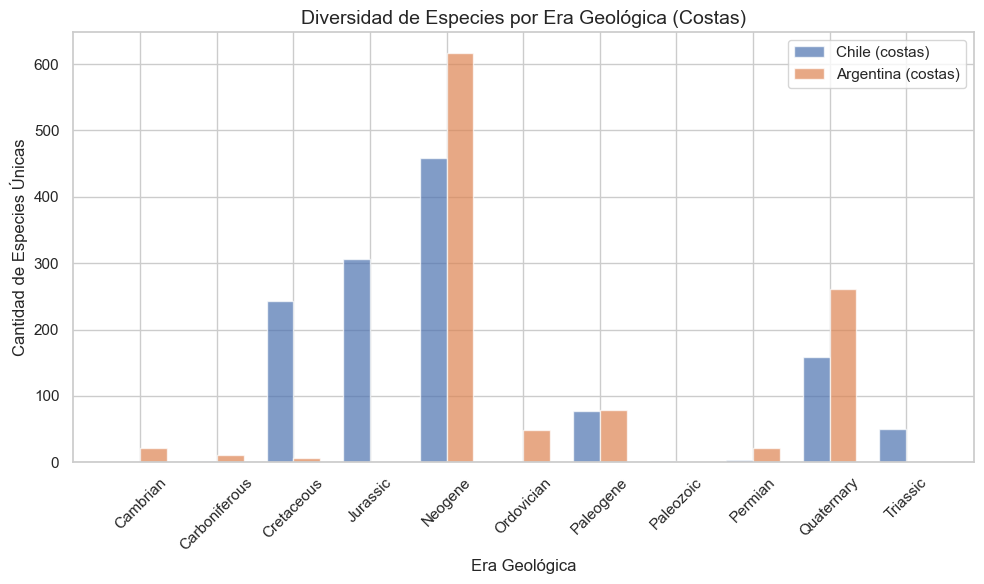

In [10]:
import seaborn as sns

sns.set(style="whitegrid")

data = pd.DataFrame({
    "Chile (costas)": species_by_era_chile_costas,
    "Argentina (costas)": species_by_era_argentina_costas
}).fillna(0)

x = np.arange(len(data.index))
width = 0.35

plt.figure(figsize=(10, 6))

plt.bar(x - width / 2, data["Chile (costas)"], width=width, label='Chile (costas)', alpha=0.7)

plt.bar(x + width / 2, data["Argentina (costas)"], width=width, label='Argentina (costas)', alpha=0.7)

plt.title("Diversidad de Especies por Era Geológica (Costas)", fontsize=14)
plt.xlabel("Era Geológica", fontsize=12)
plt.ylabel("Cantidad de Especies Únicas", fontsize=12)
plt.xticks(x, data.index, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()



---

### **4. Cálculo del Índice de Jaccard**
- **Objetivo:** Cuantificar la similitud entre las especies fósiles de las costas de Chile y Argentina en cada era.  

In [11]:
shared_coastal_species_count = len(shared_coastal_species)
total_coastal_species_count = len(chile_coastal_species.union(argentina_coastal_species))
jaccard_index_coastal = shared_coastal_species_count / total_coastal_species_count

print(f"Índice de Jaccard (costas): {jaccard_index_coastal:.2f}")

Índice de Jaccard (costas): 0.06


Como se puede apreciar un índice bajo (como el obtenido, 0.06) indica que las costas de Chile y Argentina comparten pocas especies fósiles, lo cual puede deberse a:  
- Barreras geográficas (como la Cordillera de los Andes).  
- Diferencias ambientales entre ambas regiones.  
- Sesgos en los registros fósiles disponibles.

### **Conclusión del Análisis**:

1. **Diversidad de Especies Fósiles:**
   - La costa de Chile presenta un total de **1132 especies únicas**, mientras que la de Argentina contiene **950 especies únicas**. Esto sugiere que la costa chilena tiene una mayor diversidad de especies fósiles registrada en los datos analizados.

2. **Similitudes entre Regiones:**
   - Se identificaron **126 especies compartidas** entre las costas de Chile y Argentina. Este número representa una fracción relativamente baja en comparación con las especies únicas de cada región, lo que indica que, aunque existe cierta similitud, la biodiversidad fósil entre ambas costas tiene características distintivas.

3. **Índice de Jaccard:**
   - El índice de Jaccard, que mide la similitud entre ambas regiones, proporcionaría unícitamente), indicando que las especies compartidas representan una proporción reducida del total combinado de especies fósiles.

4. **Factores Geológicos y Ambientales:**
   - Las diferencias observadas pueden estar influenciadas por las condiciones ambientales y geológicas específicas de cada región durante los períodos estudiados. Chile, con su proximidad al Océano Pacífico y una geografía influenciada por la actividad tectónica, podría haber ofrecido un entorno distinto al de las costas argentinas, que están influenciadas por el Océano Atlántico.

---

### **Conclusión General**
En síntesis, aunque existe un componente significativo de especies compartidas entre las costas de Chile y Argentina, los datos indican que cada región posee una biodiversidad fósil única que refleja las diferencias en sus historias geológicas y ambientales. Este análisis subraya la importancia de estudiar estas diferencias para entender cómo los factores locales moldearon la biodiversidad fósil en cada región.